# Introduction to Programming using Python and Jupyter

## Method

Suppose you want to learn how to swim.  Which method below would suit you best?
1. Getting in the shallow water with someone who can swim, and who can move your limbs if necessary, and who can show you what to do and does so
2. Reading a book about swimming before getting in the water
3. Watching a video about swimming before getting in the water

We think most of you would choose (1) for swimming, and analogously for programming: most people learn best by _doing_.  That is how this unit (and indeed this whole OER) is organized.  Even if you buy the physical book (and we think there are good reasons to have the physical book version of this OER) you will not (we think) sit down and read the whole thing before you poke any Jupyter buttons.  Instead, the OER and the book are intended to be more like a person who is in the water with you, showing you what to do, and letting you do it.

This is not to say that reference books and videos are not valuable: sometimes you will want to pause and consult the manual to see how to do something, and sometimes you will want to read ahead to see what's coming next.

[Here is a good set of videos for learning Python](https://www.philchodrow.com/PIC16A/schedule/)


[For that matter, here is a video on learning to swim](https://www.youtube.com/watch?v=Rr_CnIfr5u8)



Purpose of the chapter: introduce using Python (inside a Jupyter notebook) as a computing tool.
- The command line: computing by hand: walk through computing (say)
$F_{10}$ using a computer only minimally.
- Loops: for loops, while loops: using these to compute $F_{10}$ to get the computer to do a _bit_ more work for us.
- Lists: saving computations, plotting on regular scale, plotting on
log scale: conjectures and
questions.
- Functions: if something is done over and over again, make it a
function: inputs, outputs
- Recursion: the danger of simplistic recusion: why computing
Fibonacci numbers recursively can
lead to exponentially many sub-calls: do we talk about decorations and
how to avoid this?
- Complexity of computation: time complexity, space complexity: both
impact computation of
and display of big Fibonacci numbers
- The idea that just because an algorithm exists doesn't make it the
{\em best} algorithm.
- Better algorithms for Fibonacci numbers?
- Better algorithms for just the last few digits: iterated squaring,
intro to $2\times 2$ matrix
computations.
- Experiments to perform: Pisano periods



## The Fibonacci Numbers
The Fibonacci numbers, $F_n$, named after the nickname given to Leonardo Pisano, or 
Leonardo of Pisa,  were actually studied as early as 200 BCE by Pingala, who used them to analyse 
the number of patterns in Sanskrit poetry.  They are defined by a two-term linear recurrence relation,

$$F_{n}= F_{n-1} + F_{n-2}$$

and two initial conditions.  There are several different conventions about what the initial 
conditions should be: we will choose $F_0=0$ and $F_1=1$.  These numbers are connected by a formula known as _Binet's formula_ to the so-called Golden Ratio:

$$
\phi := \frac{1 + \sqrt{5}}{2} \approx 1.618\ldots
$$

Binet's formula says that
$$
F_n = \frac{1}{\sqrt{5}} \phi^n - \frac{1}{\sqrt{5}}\left( - \frac{1}{\phi} \right)^n
$$
and since $1/\phi < 1$ we have the excellent approximation $F_n \approx \phi^n/\sqrt{5}$, which is actually so good that for $n > 1$ you can get the exact answer merely by taking the nearest integer to this approximation.

Binet's formula is actually very weird: one takes powers of an irrational number, adds it to the same power of another irrational number, divide by $\sqrt{5}$, and out pops an integer. We will explore this by a set of exercises, although it is a digression.

In this section, we'll explore how to 
compute the values taken by $F_n$ for various different $n$: we'll start by doing some really 
basic things, and gradually develop better methods.  If you have lots of coding experience, you
will recognize the way we are doing things as basic: but if you are new to coding, we hope that this
will gently get you started to thinking a computational way.

First, we start by using the Python kernel attached to this Jupyter Notebook as a calculator&mdash;no programming at all. We type our arithmetic into the cell below (which should be specified as a "Code" cell in the menu up above, as opposed to a "Markdown" cell which this text is written into, or either of the other types of cell it could be). Then we hold down the Ctrl key and hit "Enter" (on a PC) or hold down the Command key and hit "Enter" (on a Mac).

In [1]:
1

1

In [2]:
0+1

1

In [3]:
1+1

2

In [4]:
1+2

3

In [5]:
2+3

5

In [6]:
3+5

8

We put a simple "1" in the first cell, not for any grand purpose, but to make the labels on the left have something to do with the numbering of the Fibonacci numbers.  That is, In [2] has the definition of $F_2$ and Out[2] has the result of the computation: $0 + 1 = 1$ and indeed $F_2 = 1$.  A little compulsive on our part.  Then In [3] has the definition of $F_3$ and Out[3] has the computed result: $F_3 = 2$.  Similarly In [4] has the definition of $F_4$ and Out[4] has its value, and so on.

(Warning: Those label numbers will change if you execute other commands and then come back and re-execute these---we recommend that you don't do that, but rather stick to a linear order of execution.  In case you get confused, there is an option under the "Kernel" tabl above to Restart and Run All which will re-execute everything from the top down, and re-number the output in sequence.)

You should use the Edit menu above to insert two more code cells below here, and enter $5+8$ and hit Ctrl-Enter (or the equivalent) to get $13$, and $8+13$ and hit Ctrl-Enter to get $21$.

Simple.  You now know how to compute Fibonacci numbers, to as high an order as you want.  The tedious arithmetic will be done by the computer.

Of course once the numbers get big you will be tempted to use "cut and paste" to paste the numbers in instead of retyping them, and that works. So, there are more things than arithmetic that are tedious, and which we will want to use the computer for.

One thing that we will want to use the computer for is to ease the burden on our memory.  The In[3] / Out[3] labelling of Fibonacci numbers in a Jupyter Notebook is fragile, as we mentioned, so we might want to use Python to remember $F_0$, $F_1$, and so on.

The first way to do this is with "variables" (which are sort of like variables in mathematics, but also sort of not): in Python, variables are objects that can store a value: in our cases, the
values will be integers.  In the Jupyter notebook, input the following code.

In [7]:
F0=0
F1=1
F2=F1+F0
print(F2)

1


Execute the code by clicking the run arrow (or typing shift-enter)
and you should see the output 1, indicating that you have successfully printed $F_1$.

In the next code block, type 

In [8]:
F3=F2+F1
print(F3)
F4=F3+F2
print(F4)
F5=F4+F3
print(F5)

2
3
5


By now this should be feeling pretty repetitive, and we should be longing for a way to not have to keep typing
two more rows of code for each new Fibonacci number.  Let's try to be more systematic about it.  Let's think about what we are doing: we have a current Fibonacci number, a previous Fibonacci number, and we use them to compute the 
next one in the sequence.

$$next = current + previous.$$

Then we replace the previous one by the one which was current, and the current by the next, and repeat.  This assumes that _the only thing we need $F_n$ for is to compute the next Fibonacci numbers, and once we have done so, we may discard it_.

In [9]:
previous =0
current = 1
next = current + previous
previous = current
current = next
next = current + previous
previous = current 
current = next
next = current + previous
previous = current 
current = next
next = current + previous
previous = current 
current = next
print(next)


5


### Loops


This may seem worse than the previous code: three lines of code for each step, but since we are no longer using an explicit naming scheme for our variables, we can use _loops_ to automate things.  To do this we can use for or while loops.  Again, we are discarding everything older than the previous Fibonacci number; we will revisit this assumption presently.

In [10]:
previous = 0
current = 1
for i in range(2,6):
    next = current + previous
    previous = current
    current = next
print(i,next)    

5 5


Now we see that we can modify our loop to make it compute much further out:

In [11]:
previous = 0
current = 1
for i in range(2,31):
    next = current + previous
    previous = current
    current = next
print(i,next)   

30 832040


This tells us that $F_{30}= 832040$.

We can also use while loops to do something similar:


In [12]:
previous = 0
current = 1 
i=2 
while i< 31:
    next = current + previous
    previous = current
    current = next
    i+=1
print(i,next)   

31 832040


In this, we need to set the value of the variable: as long as the value of `i` is less than 31, the loop will be executed: in this example we have to remember to increment the value of `i` by 1 each time we execute the loop.

### Lists

Suppose that we now want to keep our computed values around once we have computed them.  One way of achieving this is to put the values in a list.

In [13]:
fib_list = [0 , 1]  # We populate the list with our initial values F_0=0, F_1=1
for i in range(2,11):
    previous = fib_list[i-2]
    current= fib_list[i-1]
    next = current+previous
    fib_list.append(next)
print(fib_list)  
print(fib_list[5])

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55]
5


Perhaps we wish instead to create a list of pairs, $[i,F_i]$: 

In [14]:
fib_list = [[0,0] , [1, 1]]  # We populate the list with our initial values F_0=0, F_1=1
for i in range(2,11):
    previous = fib_list[i-2][1]
    current= fib_list[i-1][1]
    next = current+previous
    fib_list.append([i,next])
print(fib_list)  
print(fib_list[5])

[[0, 0], [1, 1], [2, 1], [3, 2], [4, 3], [5, 5], [6, 8], [7, 13], [8, 21], [9, 34], [10, 55]]
[5, 5]


### Plots

We will see lots of plots later on, but right now what we want to do is draw a _polar plot_ which we (the authors) actually haven't done up until now in Python, so we will demonstrate not only how to do it, but how we learned how to do it.  Naturally, the answer involves Professor Google.  We entered "draw polar plot in python" in our browser, and looked at the results.  The top hit was a video (which we did not look at) and the second hit was to the ["matplotlib" documentation](https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_demo.html).  This package, matplotlib, is going to be very useful for us, and so we go ahead and do this.

The first example at that link is very nearly already what we need:

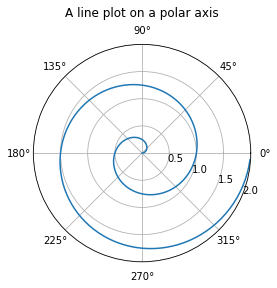

In [23]:
import numpy as np
import matplotlib.pyplot as plt


r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Fewer radial ticks (RMC had to correct the grammar in this comment)
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

The only problem is that it's drawing the wrong spiral&mdash;and we prefer, for very strong reasons, to use radian measure.  However, we'll use degrees in the labels for our plot, too, so that we only change one thing at a time.  The Fibonacci Spiral, which we take from H.S.M. Coxeter's 1969 book Introduction to Geometry, Section 11.3 (pp 164-165 in the PDF we have), suggests that the polar curve
$$
r = \frac{1}{\sqrt{5}} \phi^{2\theta/\pi}
$$
will nearly have radii equal to the Fibonacci numbers when $\theta$ is a multiple of $\pi/2$ radians.  Somewhat confusingly, the formula does not need to be converted to degrees, because the code above actually uses radians (yay!) although the labels (weirdly) are in degrees.  Fine.

So we change the definition of the data for the curve in the above example, to get the code below.  This took some fiddling: at first, we had used a formula using degrees (because the labels confused us); then we had forgotten the square root of 5 in the formula; and then we realized that we didn't need the "ax.set_rlabel_position" command, so we commented it out.  A "comment character" is a # at the start of the line: Python ignores everything after that character.  Then we changed the radial axes to be exactly Fibonacci numbers, so you can see that the spiral has radius 3 (visually) when the angle is $2\pi$ radians or 360 degrees, has radius 5 when the angle is $7\pi/2$ radians or $360+90 = 450$ degrees, radius 8 when the angle is $3\pi$ radians or 360+180=540 degrees, and so on.

Then we changed the title command, and voilá.

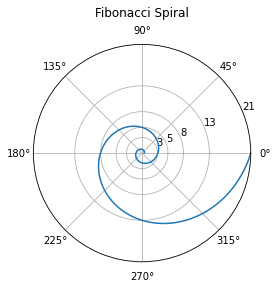

In [33]:
import numpy as np
import matplotlib.pyplot as plt


#r = np.arange(0, 2, 0.01)  # the example defined theta as a function of r whereas
#theta = 2 * np.pi * r      # we want to do this the other way round
phi = (1+np.sqrt(5))/2
theta = np.arange(0,4*np.pi,0.01)  # Make a fine grid of theta values going twice round the circle
r = phi**(2*theta/np.pi)/np.sqrt(5)  # The corresponding r values from the Golden Spiral Formula

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}) # same as before
ax.plot(theta, r) # same as before
ax.set_rmax(21) # changed from 2
ax.set_rticks([3, 5, 8, 13, 21])  # Show Fibonacci radii for our plot
#ax.set_rlabel_position(-22.5)  # don't need this command
ax.grid(True) # same as before

ax.set_title("Fibonacci Spiral", va='bottom') # change the title
plt.show()

Several important things happened in that example.  First, we "imported" some extremely useful packages of routines, namely "numpy" (for numerical work, using floating-point arithmetic) and "matplotlib.pyplot" for plotting.  To take square roots, we need numerical routines: the square root function is called "sqrt" but it's in numpy.  In our import command we decided to use "np" as an abbreviation for numpy.  This is common, but we could have used anything (we could have done it in a cursed fashion and "import numpy as plt" and "import matplotlib.pyplot as np", in fact---we do _not_ recommend doing this: please keep things to be what you expect them to be!).  

Python is _object oriented_ and so the things it deals with typically have _methods_ associated with them. So a "plot object" will have an "axis object" associated with it---this was accessed by the command plt.subplots.  Thereafter we chose the axis options by calling the methods associated with the axis object, which we named "ax" (naturally enough).  This is weird, but you will get used to it, and it has advantages.  Right now, we can just use the syntax by copying and changing and not worrying too much about it.

### Functions

If we wish to compute lots of values of Fibonacci numbers there are various things we could do: precompute all the values we need and store them in a list, for example.  Sometimes the best thing to do is to write a function which we can call when we need a particular value.


In [15]:
def fibo(n):
    previous = 0
    current = 1 
    i=2 
    while i< n+1:
        next = current + previous
        previous = current
        current = next
        i+=1
    return(next)    
print(fibo(5)) 
print(fibo(30))
    

5
832040


We can now test how fast our code is: for how large an input $n$ can we compute `fibo(n)` in realistic time?
As an aside, in our context we use "realistic time" to mean a few seconds or a minute.  Depending on the importance of a computation, realistic time could mean minutes, months, or even years.

In [16]:
import time
t=time.time()
fibo(1000)
time.time()-t

0.0

In [17]:
t=time.time()
fibo(10000)
time.time()-t

0.006979942321777344

In [18]:
t=time.time()
fibo(100000)
time.time()-t

0.1406245231628418

In [19]:
t=time.time()
fibo(1000000)
time.time()-t

8.972126483917236

We see that by the time we get to $n=10^6$, the code has started to slow down considerably.

### Cost and complexity in time and space


There are several useful notions of the _cost_ of a computation.  Perhaps the most important one is the carbon cost: every computation takes energy and how that energy is generated really matters. Floris van der Tak says "before you ask for time on a facility, first check what kind of power they are using”, in [this 2022 article on carbon cost](https://physicsworld.com/a/the-huge-carbon-footprint-of-large-scale-computing/).  Then there is _opportunity cost_: if you are spending time and compute cycles on this, then you are not spending it on something else (which might be more useful).  This is, of course, spectacularly hard to measure because you have to think of all the other things you could be doing.  

More mundanely, you can think about the cpu time and memory resources that you use on a given machine.  Memory usage is especially complicated nowadays, but at its most basic, how you organize your data can affect the time and energy needed to do your computation.  

We're actually not going to worry at all about that, just now.  Instead we are going to think about a variation of opportunity cost, namely "don't waste time computing things that you don't need, or have already computed".  This sounds easy enough, but turns out to require serious thinking.  In fact, about _half_ of all speed gains for computation over the last fifty years have come from _algorithmic improvements_ and the other half from hardware improvements.  It turns out that finding the best way to compute something (or even just "a better way") is frequently very difficult.  The whole field of "complexity theory" studies this using various models.  The _complexity_ of a problem, loosely speaking, is the _minimal cost_ of computing the answer.  For a great many problems---even for something so simple as matrix multiplication!---the complexity is not known, although we have many algorithms of varying cost.  

At its most basic, we need to think about how many steps a program will take, and how long each step will take.  For the function `fibo()` it is easy to see that computing `fibo(n)` will take $n-1$ additions: however, this is not the end of the 
story, since the summands are increasing in size, and adding large numbers takes longer than adding small numbers.
How do we measure the size of an input $n$?  One decent way to think of this is how many bits are needed to specify  $n$: that is, about $\log_2(n)$.  

Now it turns out that the number of bitwise operations needed to add two $k$-bit integers grows linearly in $k$ (can you convince yourself that this is true?).  Let's suppose that it takes $c_1 k$ bitwise operations.

###  Exercise 

Compute the $n$ Fibonacci number for $n=100$, $1000$, and $10000$.  How many digits does each have?
Can you predict the number of digits in $F_n$ as a function of $n$?  How many bits in the binary expansions?

Explore Binet's formula for $F_n$: this should allow you to obtain a formula for the number of bits in $F_n$.
Let's suppose that $F_n$ has $c_2 n$ bits.


Back to complexity: adding $F_{n-1}$ and $F_{n-2}$ involves summing two numbers with $c(n-1)$ and $c (n-2)$ bits: this takes $c_1 c_2 (n-1)$ bitwise operations.  If we have to do this for all the smaller Fibonacci numbers too,
we would end up with 

$$\sum_{k<n}c_1 c_2 k=c_1 c_2\binom{n}{2}$$

This suggests that the time complexity of the function `fibo(n)` is quadratic in $n$ (_not the size of $n$_): that is if we double $n$, we roughly quadruple the time to compute `fibo(n)`.

The space complexity of this algorithm is easier to compute: we basically need a constant multiple of the number 
of bits of output, which we saw earlier was $c_1 n$.  We should note that this, while linear in $n$, is exponential in $\log_2 n$, the _size_ of $n$.

### Recursion

We can sometimes write simpler code if we use the idea of recursion.  Let's define a function `fibor(n)` which will recursively call `fibor(n-1)` and `fibor(n-2)`.

In [20]:
def fibor(n):
    if n== 0:
        return(0)
    elif n==1:
        return(1)
    else:
        return(fibor(n-1)+fibor(n-2))
print(fibor(5))
print(fibor(30))

5
832040


We should point out, however, that as intuitive and nice as recusive code can be, issues can arise.  Without care, and especially in a case like this, recursive function calls can grow exponentially.  

In [21]:
counter=0  # This will count the number of times we call fibor
def fibor(n):
    global counter # This will allow fibor() to reference the variable counter inside the function
    counter+=1
    if n== 0:
        return(0)
    elif n==1:
        return(1)
    else:
        return(fibor(n-1)+fibor(n-2))
print(fibor(5))
print(counter)
counter=0
print(fibor(30))
print(counter)

5
15
832040
2692537


We see that in computing $F_5$ we already made 15 calls to `fibor()`: in computing $F_{30}$ we made over 2 million recursive calls.  This means that the recursive function `fibor()` is unusable for even moderate values of $n$.


In [22]:
counter=0
t=time.time()
print(fibor(30))
print(counter)
print(time.time()-t)
counter=0
t=time.time()
print(fibor(40))
print(counter)
print(time.time()-t)

832040
2692537
0.7627263069152832
102334155
331160281
94.09751081466675


The problem here is this: considering $F_5$ for concreteness: $F_5$ calls $F_4$ and $F_3$.  $F_4$ calls $F_3$ and $F_2$.  Each of the two $F_3$ calls calls $F_2$ and $F_1$.  Each of the three $F_2$ calls calls $F_1$ and $F_0$: 
thus we get 
$$1 (F_5) + 1(F_4) + 2(F_3) + 3(F_2) + 5(F_1)+3(F_0) = 15 $$
total calls to `fibor()`.  

There are ways to avoid this, using "memoization" and "decorators" to ensure that python realizes that we have already called $F_k$ and doesn't spawn multiple subroutines calling the same function, but that is a more 
advanced topic than we are covering here.

### Is there a better way?


One of the themes that we will stress along the way is that, just because we have an algorithm or an implentation 
of an algorithm which works, doesn't mean that we should stop there: there may be a better algorithm.  Perhaps one that runs faster, or uses less memory.  Sometimes we'll be able to find algorthms that will run _much_ faster, or use much less space!  Sometimes we can trade off using more space to use much less time.

### Matrices and linear recurrences


We will introduce matrices in a later unit, namely the Bohemian matrices unit; but many readers will have seen them anyway, and so for this subsection we will use them without defining them.  If matrices are unfamiliar to you, skip the unit (for now).

Let's observe that we can rewrite the Fibonacci recurrence as a linear matrix-vector recurrence in a very simple way.  
If we let $\underline{v}_n$ denote the vector

$$
\underline{v}_n = 
\begin{bmatrix}  F_n\\ F_{n-1}
\end{bmatrix}
$$

and let $A$ denote the matrix 

$$
A=\begin{bmatrix}
1 & 1 \\
1 & 0
\end{bmatrix}
$$

then we can rewrite the Fibonacci recurrence as 

$$\underline{v}_n = A \underline{v}_{n-1}$$

which can be followed back to deduce that 

$$
\underline{v}_n = A^n \underline{v}_0.
$$

This means that if we can compute powers of $A$ efficiently we can also compute $F_n$ efficiently.
This brings us to the following important idea.

### Iterated squaring to compute powers 

Consider the expression $A^{25}$.  Naively, multiplying 25 copies of $A$ together takes 24 multiply operations: this can be significantly improved as follows: compute $A$, $A^2$, $A^4=(A^2)^2$, $A^8=A^4)^2$ and $A^{16}=(A^8)^2$.  This takes 4 multiplies.  Now compute $25=16+8+1$, so $A^{25}=A^{16}A^8A$ requiring two more multiplies, for a total of 6.

In general, to compute $A^n$, we compute $A^{2^k}$ for $k$ up to $\log_2 n$ using iterated squaring.  
Then we multiply the appropriate subset of these iterated squares together by computing the binary expansion of $n$.  This takes a total of fewer than $2 \log_2 n$ matrix multiplications.

Now, we have replaced the complexity of adding enormous numbers with the complexity of multiplying enormous numbers, but far fewer times.  If you choose to study the complexity of multiplying two large integers together, there is a wonderful rabbit hole to go down, starting from naive multiplication of two $n$ bit integers, which 
takes $O(n^2)$ operations, to the beautiful Karatsuba' algorithm, with complexity about $O(n^{1.585})$, to the 
Schönhage-Strassen algorithm which has asymptotic complexity $O(n\log n \log\log n)$, and the recent 
$O(n \log n)$ algorithm of Harvey and van der Hoeven.

If we use these more sophisiticated methods, we can obtain an algorithm for computing $F_n$ of order about 
$O(n \log n)$,  We can't expect much better than that, since even outputting the digits of $F_n$ is of order 
$O(n)$.

### Exercise: 
Figure out how to implement iterated squaring to compute $A^51$ by a sequence of python statements.  Then code a function which will take $n$ as an input, and return $A^n$.  You should only need to keep one expression of the 
form $A^{2^k}$ around at a time if you are careful.  Hint: find the low order bits of $n$ first.

it is clear at this point that what limits our computation of big Fibonacci numbers is the size of the results. What if we only want to compute the final few digits of $F_n$?  Now the size of the output (and of the intermediate computations) is kept small, and the limiting factor is the number of squarings of matrices we are going to perform.  Consequently it is now feasible to take something like $n=7^{12345678}$ and compute the 
final 100 digits of $F_n$.



### Again, is there a better way?
We can revisit the question: is there a better way to compute this?

### Hard problems and Open problems

Fibonacci numbers have been studied for so long that (surely?) everything must be known about them by now?  There are books and books and papers (and a whole Journal) about them, after all.

Um, no.  See for instance [this Twitter thread](https://twitter.com/_onionesque/status/1541539643312799751?s=20&t=JgTNa-u1U1Mk0YDjBL4FKA) which links to papers such as the 1999 paper [Random Fibonacci sequences and the number 1:13198824...](https://doi.org/10.1090/S0025-5718-99-01145-X) by Divakumar Viswanath, in the journal Mathematics of Computation (which is a very highly-regarded journal, by the way).  

The Twitter thread also links to the paper [Probabilizing Fibonacci numbers](https://statweb.stanford.edu/~cgates/PERSI/papers/probabilizing-fibonacci.pdf) by Persi Diaconis, which includes the following paragraph in its introduction:

__Fibonacci numbers have a "crank math" aspect but they are also serious stuff&mdash;from sunflower
seeds through Hilbert's tenth problem. My way of understanding anything is to ask, "What does
a typical one look like?" Okay, what does a typical Fibonacci number look like? How many are
even? What about the decomposition into prime powers? Are there infinitely many prime Fibonacci
numbers? I realize that I don't know and, it turns out, for most of these questions, nobody knows.__

That paper is advanced indeed, and casually uses tools from number theory, probability theory, and calculus to answer _some_ of those hard problems.  We refer to this paper here not as a reference for this OER, but rather to say that even the experts have a lot to learn about Fibonacci numbers.


### Notes and References, and some digressions (with exercises)

#### History of the so-called Fibonacci numbers, or, should they be called Pingala numbers instead?

#### Who was Binet, and what's going on with that formula?

Binet's formula says that

$$
F_n = \frac{1}{\sqrt{5}} \phi^n - \frac{1}{\sqrt{5}}\left( - \frac{1}{\phi} \right)^n
$$

where $\phi = (1+\sqrt5)/2$ is the golden ratio.  Let's do some hand computation and see if we can figure out what is going on.  This is something one of us did (by hand, yes) and has two purposes for this OER: first, to show you that we don't know everything off the bat and have to figure some things out as we go, just as you do, and the other is to supply some jumping-off points for your own noodling with Fibonacci numbers.

First we do the basic things: plugging in $n=0$ gives us, sure enough, $F_0 = \frac{1}{\sqrt{5}} \phi^0 - \frac{1}{\sqrt{5}}\left( - \frac{1}{\phi} \right)^0 = \frac{1}{\sqrt{5}}  - \frac{1}{\sqrt{5}} = 0$.  Good.  To do the case $n=1$ we will have to actually compute $-1/\phi$ and this can be done by

$$
\frac{1}{\phi} = \frac{1}{(1+\sqrt5)/2} = \frac{2}{1+\sqrt5} = \frac{2}{(1+\sqrt5)}\cdot\frac{(1-\sqrt5)}{(1-\sqrt5)}
$$

where we have multiplied by the factor $1 = \frac{(1-\sqrt5)}{(1-\sqrt5)}$ because, looking ahead, the product $(1+\sqrt5)(1-\sqrt5)$ is going to become a difference of squares and simplify to $1 - 5 = -4$.  This rationalizes $1/\phi$ to be

$$
\frac{1}{\phi} = \frac{2}{-4}\cdot(1-\sqrt5) = \frac{-1+\sqrt5}{2} \approx -0.618\ldots.
$$

With that done, one can work patiently through to get

$$
F_1 = \frac{1}{\sqrt5}\left( \frac{1+\sqrt5}{2} \right) - \frac{1}{\sqrt5}\left( \frac{1-\sqrt5}{2} \right)
$$

and, as if by magic, the $1/2$s cancel, the $\sqrt5$s combine (and then the factor of 2 cancels) and the factor of $\sqrt5$ cancels and we get $F_1 =  1$.

A lot of work to get something that we already knew.  But, we persist.  We compute $\phi^2$ and $1/\phi^2$ (yes, by hand, still, because we're on a quest to find out what is going on, and at this point in the OER computation by computers is still a question and not an answer) and we see

$$
\phi^2 = \frac{(1+\sqrt5)^2}{2^2} = \frac{(1+\sqrt5)(1+\sqrt5)}{4} = \frac{ 1 + 2\sqrt5 + 5}{4} = \frac{6 + 2\sqrt5}{4} = \frac{3+\sqrt5}{2}.
$$

Similarly,

$$
\left(-\frac{1}{\phi}\right)^2 = (-\phi)^{-2} = \frac{(1-\sqrt5)^2}{2^2} = \frac{(1-\sqrt5)(1-\sqrt5)}{4} = \frac{ 1 - 2\sqrt5 + 5}{4} = \frac{6 - 2\sqrt5}{4} = \frac{3-\sqrt5}{2}.
$$

Now, carefully tracking the minus signs  (yes this is annoying), we find that Binet's formula again gives us what we knew:

$$
F_2 = \frac{1}{\sqrt5}\left( \frac{3+\sqrt5}{2}\right) - \frac{1}{\sqrt5}\left( \frac{3-\sqrt5}{2}\right) = 1.
$$

We can do one more by hand, but the desire to look for a trick to simplify all this tedium has already surfaced (and yes, there is a nice trick, but let's get a little more data).  We compute both $\phi^3$ and $(-1/\phi)^3$ by hand to get

$$
\phi^3 = \phi^2\cdot\phi = \left(\frac{3+\sqrt5}{2}\right)\cdot\left(\frac{1+\sqrt5}{2}\right) = \left( \frac{3+4\sqrt5 + 5}{4} \right) = \frac{4+2\sqrt5}{2}
$$

and

$$
\left(-\frac{1}{\phi}\right)^3 = \left(\frac{3-\sqrt5}{2}\right)\cdot\left(\frac{1-\sqrt5}{2}\right) = \left( \frac{3-4\sqrt5 + 5}{4} \right) = \frac{4-2\sqrt5}{2}.
$$

Combining these using Binet's formula gives us $F_3 = 2$, which again we knew.

(And before you accuse us of cheating, RMC says not only did he do all the computations by hand, he typed out the Markdown by hand, too, so there.)

From this, we conjectured (and then proved for ourselves using induction) that we may write $\phi^n = (a_n + b_n\sqrt5)/2$ all the time, where both $a_n$ and $b_n$ are positive integers; more than that, both $a_n$ and $b_n$ are even, or both $a_n$ and $b_n$ are odd, we never mix an odd $a_n$ with an even $b_n$ or vice-versa. We found a nicer rule for computing the $a_n$ and $b_n$, namely
\begin{align*}
a_{n+1} =& \frac{ a_n + 5b_n}{2} \\
b_{n+1} =& \frac{ a_n + b_n}{2}.
\end{align*}
Those are fun things to prove, if you like to prove things by induction.  Here are the first few $a$s and $b$s.

| n | $a_n$ | $b_n$ |
| :---: | -------: | -------: |
| 0 |   2   |  0    |
| 1 |   1   |  1    |
| 2 |   3   |  1    | 
| 3 |   4   |  2    |
| 4 |   7   |  3    |
| 5 |  11   |  5    |
| 6 |  18   |  8    |
| 7 |  29   | 13    |
| 8 |  47   | 21    |

We then thought to run this table _backwards_ (because we need $\phi^{-n}$) and found

| n | $a_n$ | $b_n$ |
| :---: | :---: | :---: |
| 0  |   2    |  0    |
| -1 |   -1   |  1    |
| -2 |   3    |  -1   | 
| -3 |   -4   |  2    |
| -4 |   7    |  -3   |
| -5 |  -11   |  5    |


This looks like just a simple set of arithmetic computations.  It looks kind of redundant and useless, because we see that the $b_n$'s are really Fibonacci numbers themselves (indeed $b_n = F_n$).  One can then notice that the $a_n$s are also solutions of the Fibonacci recurrence relation, that is $a_{n+1} = a_n + a_{n-1}$, but with different initial conditions: $a_0 = 2$ and $a_1 = 1$.  Then we notice that it seems to show that $F_{-n} = (-1)^{n-1} F_n$ is a consistent definition (consistent with Binet's formula, which also gives $F_{-n} = (-1)^{n-1}F_n$) of Fibonacci numbers of negative index, and so we might wonder further what a Fibonacci number of _complex_ index might look like. [Here's Stand-Up Maths on the subject](https://youtu.be/ghxQA3vvhsk).  

This collection also gives an example of a different sort of numbers, namely the set of all numbers of the form $a+b\sqrt5$.  As we saw above, when we multiply two numbers of this sort, we get something of the same kind (in fact we have a bit more special here because of the one-half in everything, which needs the "both even" or "both odd" rule to help us out with). 


By the way, [Eric Weisstein says that](https://mathworld.wolfram.com/BinetsFibonacciNumberFormula.html) although Binet did publish his formula in 1843, at least Euler, Daniel Bernoulli, and Abraham DeMoivre knew the formula a century earlier.  [Here is the Wikipedia article on Binet](https://en.wikipedia.org/wiki/Jacques_Philippe_Marie_Binet) and a more detailed biography can be found at the [MacTutor site](https://mathshistory.st-andrews.ac.uk/Biographies/Binet/).  Among other things, we learn that the rule for matrix multiplication that is used today was first articulated by Binet.

Obviously, using these $a_n$ and $b_n$ to compute $\phi^n$ as a step to computing Fibonacci numbers "begs the question". But at least it sort of explains how this crazy-looking formula works.

Exercise: write down some questions about Binet's formula and Fibonacci numbers.

#### The curious number 10/89, and some other curious numbers

We begin with a pattern-detection problem.  Can you predict what is the next number in the sequence $10/89$, $100/9899$, $1000/998999$, $\ldots$?  Stop reading now if you want to try to find it yourself.  We see a sort of weird pattern there: use the numbers $8$, $9$, and $10$ to get $10/89$, and use the numbers $98$, $99$, and $100$ to get $100/9899$, and similarly $998$, $999$, and $1000$ to get the final one.  Then the next number would be $10000/99989999$.  Of course there are other patterns, but that's the one we wanted.

What has this got to do with Fibonacci numbers?  Look at the decimal expansion!  This occurs in several places on the internet, by the way (at least the $10/89$ one does, sometimes as $1/89$).  We get

$$
\frac{10}{89} = 0.112359\ldots
$$

which starts off with a copy of the Fibonacci sequence, up until the 9.  In fact, if you are a bit careful and use more digits you see that the 9 is an 8 followed by a 13 but the 1 in the tens place in the 13 has to be added to the 8, messing up the pattern.  This seems _weird_.

It gets weirder. Look at the next one:

$$
\frac{100}{9899} = 0.0101020305081321345590\ldots
$$

where, sure enough, the $90$ where we expect an $89$ arises because of a collision with the $144$ coming next.

Try the next one: you will see that it works perfectly up until a collision with the first four-digit Fibonacci number.  [Yes, there is a math stack exchange post on this subject]([https://math.stackexchange.com/questions/776855/fibonacci-numbers-from-998999).  

Can this be a coincidence, or is it the start of something deeper?  This is an example of what is known as a "leading question", of course.  _Of course_ this is the start of something deeper: a very interesting subject known as "Generating Functions" which is deeply connected to the calculus topic of power series.  We don't want to step on the toes of anyone's Calculus course, or combinatorics or probability courses for that matter, but we feel that we absolutely have to give the Generating Function that is lying behind these seemingly crazy coincidences.

Consider the function

$$
G(z) = F_0 + F_1 z + F_2 z^2 + F_3 z^3 + \cdots
$$

where we take the $\cdots$ to mean that we take a lot of terms---how many terms?  "Enough".  In your Calculus class you will learn that in this case this makes sense even when you take an infinite number of terms (provided $|z| < 1/\phi$) but we really don't need that here.  What we do need is a closed form for $G(z)$, and some sleight-of-hand algebra shows us what it _must_ be, if it is anything at all.  Multiply $G(z)$ by $z$ and by $z^2$ and add them up with the following signs:
\begin{align}
G(z) = F_0 + F_1 z +& F_2z^2 + F_3z^3 + \cdots + F_{n}z^{n} + \cdots \nonumber\\
-zG(z) =      -F_0 z -& F_1z^2 - F_2z^3 - \cdots - F_{n-1}z^{n} - \cdots \nonumber\\
-z^2G(z) =         -& F_0 z^2 - F_1z^3 - \cdots - F_{n-2}z^n - \cdots
\end{align}
When we add these, column by column, every term of order $z^2$ or higher cancels (because of the Fibonacci number definition), and we are left with

$$
G(z)(1-z-z^2) = F_0 + (F_1-F_0)z = z
$$

or, on division,

$$
G(z) = \frac{z}{1-z-z^2} .
$$

Since $F_0 = 0$ we have $G(z) = F_1 z + F_2 z^2 +\cdots$. The function $G(z)$ is called a _generating function_ for the Fibonacci numbers.  Generating functions are extremely useful in a number of places in mathematics, especially in random processes, but we're not going to say anything more here.  You can check that the computation is correct by computing the _Taylor series_ of this function using your favourite computer algebra system (or, if you like, by hand---using partial fractions just gets you Binet's formula back again, by the way).

What's the relevance here?  Put in $z=1/10$ and we find that

$$
G(z) = G(\frac1{10}) = \frac{10}{89}
$$

and

$$
G(z) = G(\frac1{100}) = \frac{100}{9899}
$$

and so on.  In terms of the defining sum, we have the _decimal expansion_ (well, until the first collision)

$$
G(\frac1{10}) = F_1 \times\frac{1}{10} + F_2\times\frac{1}{10^2} + F_3\times\frac{1}{10^3} + \cdots
$$

showing that the connection between Fibonacci numbers and these fractions is real, not just a coincidence.

Some mysteries remain.  We know that these fractions must _repeat_ in decimal form.  But Fibonacci numbers don't repeat! Or do they? What's going on, here?  Other questions that might occur to you include "Does this work in other bases, perhaps base $16$?"  And does using the generating function give us an efficient way to compute Fibonacci numbers?

And (which puzzles us still) why does the $8-9-10$, $98-99-100$, etc pattern show up?  Does something like that happen for other bases?

#### Web references for Python programming

#### Web references for Jupyter notebooks

#### Web references for Jupyter Books

#### Books about Fibonacci numbers

#### Accessible papers about Fibonacci numbers